In [1]:
import csv
import os
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import rpy2.rinterface
import pandas as pd
from __future__ import division
import re

In [2]:

datafiles = []
# Tish data
# directory = '/Users/marie/Documents/Projects/AP_Project/data/Testing_Tish/new_gender_noise_tw-12-10-18_20181210_110855.csv'

# control data
# directory = "/Users/marie/Documents/Projects/AP_Project/data/test_pilots/gender/*.csv"


# morph directory
# directory = "/Users/marie/Documents/Projects/morph_project/data/pilot/sex_morph/new_gender_results_20190619_1847/*.csv"
# directory = "/Users/marie/Downloads/Re__To_dos_this_week_1/new_gender_F0043HY.csv"
directory = "/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/*.csv"

In [3]:
import glob
datafiles.append(glob.glob(directory))

In [4]:
datafiles[0]

['/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_F001YQ0.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_F003X50.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_f0042w6.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_f003d5q.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_f003d7y.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_f003d8d.csv',
 '/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gen

In [5]:
# how many files do I look at?
#this is to check if the loading worked correctly
x=0
for i in datafiles[0]:
    x+=1
    
x    

15

In [6]:
df = pd.read_csv(datafiles) #take number of rows that you need to specify in next cell from error in this cell

ValueError: Invalid file path or buffer object type: <type 'list'>

In [7]:
correct_response = 0
correct_responses = []
perc_correct = []
perc_corr = 0

for directory in datafiles[0]:
    df = pd.read_csv(directory, sep=',', names=list(range(26))) #behind range, enter the number of rows that the error above specifies
    df.columns = df.iloc[3]
    df = df[4:]
    correct_response = pd.to_numeric(df['correct']).sum()
    correct_responses.append(correct_response)
    perc_corr = correct_response/50
    perc_correct.append(perc_corr)

    

In [8]:
perc_correct

[0.92,
 0.82,
 0.94,
 0.8,
 0.74,
 0.82,
 0.9,
 0.9,
 0.92,
 0.82,
 0.76,
 0.92,
 0.72,
 0.8,
 0.7]

In [12]:
files= datafiles[0]

re.sub(r'Users', "", files[0])
# /^(.*[\\\/])/

subj = []
for i in range(len(files)):
    new_str = re.sub(r'/Users/marie/Documents/Projects/morph_project/sex_moprh/sex_morph_20_trials/data/results/63_83__113_53_inlab/new_gender/new_gender_', "", files[i])
    subj.append(new_str)

In [13]:
response_person_dic = {'subj': subj, 'percent correct': perc_correct}

df_overview  = pd.DataFrame(response_person_dic)
df_overview 
df_overview.to_csv('results_newGender_test')

In [14]:
df_overview

,percent correct,subj
0,0.92,F001YQ0.csv
1,0.82,F003X50.csv
2,0.94,f0042w6.csv
3,0.80,f003d5q.csv
4,0.74,f003d7y.csv
5,0.82,f003d8d.csv
6,0.90,F003WYC.csv
7,0.90,f002wfg.csv
8,0.92,F003XKR.csv
9,0.82,f003md7.csv


In [40]:
#mean percentages
mean_perc = np.mean(correct_responses)/len(df)
mean_perc

0.7847058823529411

In [43]:
sd = np.std(correct_responses)
sd

4.929257332973323

In [44]:
# sd percentages
sd_perc = sd/len(df)
sd_perc

0.09858514665946647

In [47]:
normal_range_low = mean_perc - sd_perc
print(normal_range_low)


0.6861207356934746


In [41]:
len(df)

50

In [42]:
#mean points
mean = np.sum(correct_responses)/len(correct_responses)
mean

39.23529411764706

In [45]:
mean_perc - 2* sd_perc

0.5875355890340082

In [20]:
np.var(correct_responses)

9.240000000000002

In [21]:
print(max(correct_responses) , min(correct_responses))

(48, 36)


In [22]:
Range = max(correct_responses) - min(correct_responses)
Range

12

In [23]:
df = pd.DataFrame(correct_responses)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ad73490>]],
      dtype=object)

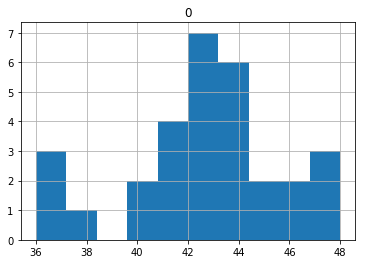

In [24]:
df.hist()

In [29]:
plotlist = []
for i in correct_responses:
    plotlist.append(i/50)

plotlist

[0.8,
 0.82,
 0.82,
 0.88,
 0.9,
 0.84,
 0.9,
 0.74,
 0.92,
 0.82,
 0.8,
 0.84,
 0.84,
 0.86,
 0.92,
 0.84,
 0.88,
 0.96,
 0.86,
 0.88,
 0.74,
 0.88,
 0.88,
 0.72,
 0.96,
 0.94,
 0.88,
 0.76,
 0.82,
 0.86]

In [30]:
for i in plotlist:
    print i>0.79
    

True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
False
True
True


In [27]:
correct_responses

[40,
 41,
 41,
 44,
 45,
 42,
 45,
 37,
 46,
 41,
 40,
 42,
 42,
 43,
 46,
 42,
 44,
 48,
 43,
 44,
 37,
 44,
 44,
 36,
 48,
 47,
 44,
 38,
 41,
 43]

In [28]:
35/75

0.4666666666666667

In [24]:
col_list= list(df)
col_list = [c for c in col_list if c == 'correct']
col_list
df['itemsum'] = df[col_list].sum(axis=1)
# df['e'] = df[col_list].sum(axis=1)
# df
# Out[99]:
#    a  b   c  d  e
# 0  1  2  dd  5  3
# 1  2  3  ee  9  5
# 2  3  4  ff  1  7

In [25]:
col_list

[]

In [26]:
# get scores per item
item_sum = 0
#make nan matrix with number of items by number of subjects
# get number of items as length(col_list)?
# get number of subjects by length(datafiles[0])
# fill matrix in with a for loop
# sum per row

for directory in datafiles[0]:
    df = pd.read_csv(directory, sep=',', names=list(range(17))) #behind range, enter the number of rows that the error above specifies
    df.columns = df.iloc[2]
    df = df[3:]
    col_list= list(df)
    col_list = [c for c in col_list if c == 'correct']
#     col_list
    item_sum = df['itemsum'] = df[col_list].sum(axis=1)
 
 

In [27]:
a

NameError: name 'a' is not defined

In [28]:
correct_responses

[59, 53, 52, 50, 77, 71, 68, 60, 58, 71]

In [29]:
# haven't figured out how to do this automated but change the number in the second brackets after datafiles
# this will give you a different directory
#the execute the code below
directory = datafiles[0][9]
df = pd.read_csv(directory, sep=',', names=list(range(17)))
df.columns = df.iloc[2]
df = df[3:]

In [30]:
stim_df=pd.DataFrame(df['stim1'])
correct_df=pd.DataFrame(df['correct'])

In [31]:
itemized_df = pd.concat([itemized_df,correct_df.T])

NameError: name 'itemized_df' is not defined

In [32]:
itemized_df.T

NameError: name 'itemized_df' is not defined

In [33]:
#get info
pd.set_option('display.max_columns', 75)
itemized_df

NameError: name 'itemized_df' is not defined

In [34]:
x = itemized_df.T[itemized_df.T['stim1'] == 'male_*']

NameError: name 'itemized_df' is not defined

In [35]:
itemized = itemized_df
itemized.columns = itemized.iloc[0]
# itemized.reindex(itemized.index.drop(0))
itemized.T

NameError: name 'itemized_df' is not defined

In [36]:
pd.set_option('display.max_columns', 77)
itemized.describe([1],include='all')

NameError: name 'itemized' is not defined